In [1]:
#
# prototype decaying species function
#
def c1dadrd(c_source,space,time,dispersion,velocity,retardation,decay):
    from math import sqrt,erf,erfc,exp  # get special math functions
    dee = dispersion/retardation
    vee = velocity/retardation
    uuu = (vee**2 + 4.0*decay*dee)
    uuu = sqrt(uuu)
    arg1 = (space*(vee-uuu))/(2.0*dee)
    arg2 = (space - uuu*time)/(2.0*sqrt(dee*time))
    arg3 = (space*(vee+uuu))/(2.0*dee)
    arg4 = (space + uuu*time)/(2.0*sqrt(dee*time))
    temp1 = c_source/2.0
    temp2 = exp(arg1)
    temp3 = erfc(arg2)
    temp4 = exp(arg3)
    temp5 = erfc(arg4)
    
    c1dadrd = temp1*(temp2*temp3+temp4*temp5)
    
    return c1dadrd

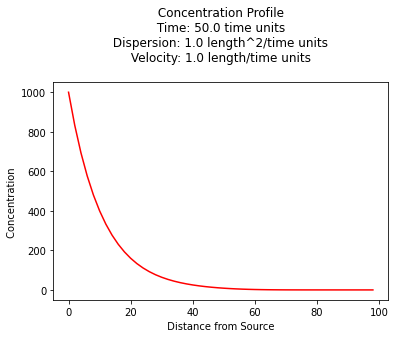

In [2]:
#
# example inputs
#
c_source = 1000.0 # source concentration
space = 100.      # how far in X-direction to extend the plot
time  = 50.       # time since release
dispersion = 1.0 # dispersion coefficient
velocity = 1.0    # pore velocity
retardation = 1.0
decay = 0.1
#
# forward define and initialize vectors for a profile plot
#
how_many_points = 50   
deltax = space/how_many_points
x = [i*deltax for i in range(how_many_points)] # constructor notation
c = [0.0 for i in range(how_many_points)]      # constructor notation
#
# build the profile predictions
#
for i in range(0,how_many_points,1):
    c[i] = c1dadrd(c_source,x[i],time,dispersion,velocity,retardation,decay)
#
# Import graphics routines for picture making
#
from matplotlib import pyplot as plt
#
# Build and Render the Plot
#
plt.plot(x,c, color='red', linestyle = 'solid')  # make the plot object
plt.title(" Concentration Profile \n Time: " + repr(time) + " time units \n" + " Dispersion: " + repr(dispersion) + " length^2/time units \n" + " Velocity: " + repr(velocity) + " length/time units \n") # caption the plot object
plt.xlabel(" Distance from Source ") # label x-axis
plt.ylabel(" Concentration        ") # label y-axis
#plt.savefig("ogatabanksplot.png") # optional generates just a plot for embedding into a report
plt.show() # plot to stdio -- has to be last call as it kills prior objects
plt.close('all') # needed when plt.show call not invoked, optional here
#sys.exit() # used to elegant exit for CGI-BIN use

In [3]:
#
# prototype decaying sourze zone function
#
def c1dadrdsrd(c_source,space,time,dispersion,velocity,retardation,decay,source_decay):
    from math import sqrt,erf,erfc,exp  # get special math functions
    dee = dispersion/retardation
    vee = velocity/retardation
    uuu = (vee**2 + 4.0*decay*dee)
    uuu = sqrt(uuu)
    arg1 = (space*(vee-uuu))/(2.0*dee)
    arg2 = (space - uuu*time)/(2.0*sqrt(dee*time))
    arg3 = (space*(vee+uuu))/(2.0*dee)
    arg4 = (space + uuu*time)/(2.0*sqrt(dee*time))
    temp0 = exp(-source_decay*time)
    temp1 = c_source/2.0
    temp2 = exp(arg1)
    temp3 = erfc(arg2)
    temp4 = exp(arg3)
    temp5 = erfc(arg4)
    
    c1dadrdsrd = temp0*temp1*(temp2*temp3+temp4*temp5)
    
    return c1dadrdsrd

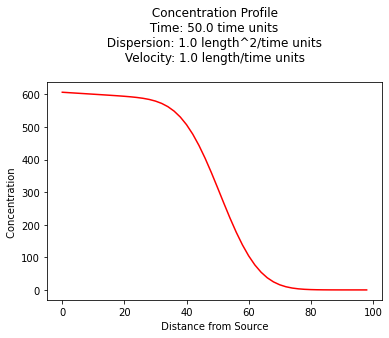

In [4]:
#
# example inputs
#
c_source = 1000.0 # source concentration
space = 100.      # how far in X-direction to extend the plot
time  = 50.       # time since release
dispersion = 1.0  # dispersion coefficient
velocity = 1.0    # pore velocity
retardation = 1.0
decay = 0.001 # species decay rate
decay_s = 0.01 # source zone decay rate (e.g. washout rate)
#
# forward define and initialize vectors for a profile plot
#
how_many_points = 50   
deltax = space/how_many_points
x = [i*deltax for i in range(how_many_points)] # constructor notation
c = [0.0 for i in range(how_many_points)]      # constructor notation
#
# build the profile predictions
#
for i in range(0,how_many_points,1):
    c[i] = c1dadrdsrd(c_source,x[i],time,dispersion,velocity,retardation,decay,decay_s)
#
# Import graphics routines for picture making
#
from matplotlib import pyplot as plt
#
# Build and Render the Plot
#
plt.plot(x,c, color='red', linestyle = 'solid')  # make the plot object
plt.title(" Concentration Profile \n Time: " + repr(time) + " time units \n" + " Dispersion: " + repr(dispersion) + " length^2/time units \n" + " Velocity: " + repr(velocity) + " length/time units \n") # caption the plot object
plt.xlabel(" Distance from Source ") # label x-axis
plt.ylabel(" Concentration        ") # label y-axis
#plt.savefig("ogatabanksplot.png") # optional generates just a plot for embedding into a report
plt.show() # plot to stdio -- has to be last call as it kills prior objects
plt.close('all') # needed when plt.show call not invoked, optional here
#sys.exit() # used to elegant exit for CGI-BIN use